In [1]:
import torch
import torchvision
import torch.nn.functional as F
from torch import nn, optim
from torchvision import transforms, datasets

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

In [2]:
EPOCH = 20
BATCH_SIZE = 64
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
print("Using Device:", DEVICE)

trainset = datasets.MNIST(
    root = './.data/',
    train = True,
    download = True,
    transform = transforms.ToTensor()
)

train_loader = torch.utils.data.DataLoader(
    dataset = trainset,
    batch_size = BATCH_SIZE,
    shuffle = True,
    num_workers = 2
)

Using Device: cuda


In [3]:
class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 16),
            nn.ReLU(),
            nn.Linear(16, 4)
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(4, 16),
            nn.ReLU(),
            nn.Linear(16, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),
        )
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [6]:
autoencoder = AE().to(DEVICE)
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001, weight_decay=0.0000001)
# , weight_decay=0.0000001
criterion = nn.MSELoss()
loss_history= []
val_loss_history = []
view_data = trainset.data[10:20].view(-1, 28*28)
view_data = view_data.type(torch.FloatTensor)/255

In [7]:
loss_last_history=[]

In [8]:
def train(autoencoder, train_loader):
    autoencoder.train()
    for step, (x, label) in enumerate(train_loader):
        x = x.view(-1, 28*28).to(DEVICE)
        y = x.view(-1, 28*28).to(DEVICE)
        label = label.to(DEVICE)
        
        encoded, decoded = autoencoder(x)
        
        loss = criterion(decoded, y)
        if step == 1:
            loss_history.append(loss.data)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

[Epoch 1]


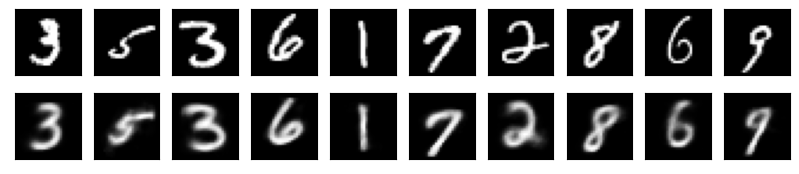

[Epoch 2]


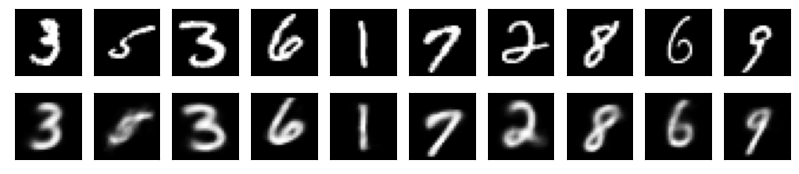

[Epoch 3]


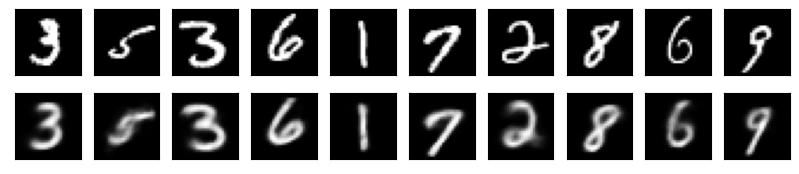

[Epoch 4]


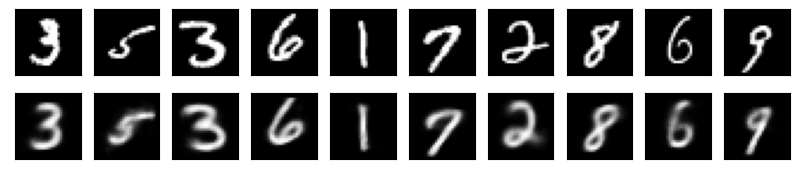

[Epoch 5]


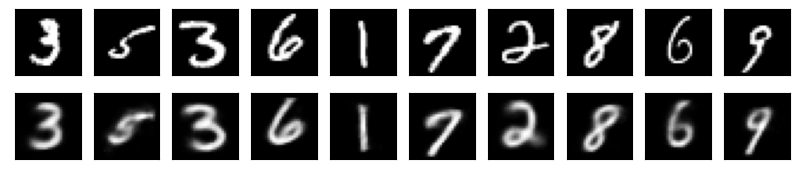

[Epoch 6]


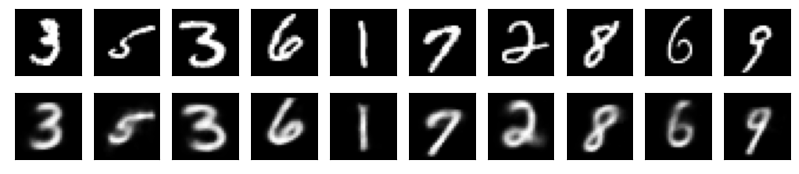

[Epoch 7]


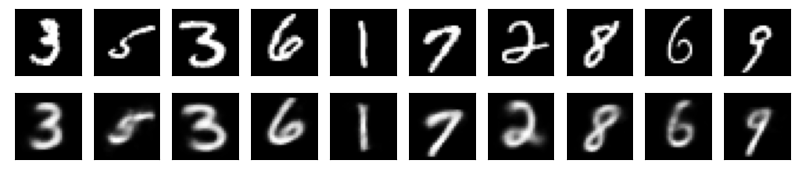

[Epoch 8]


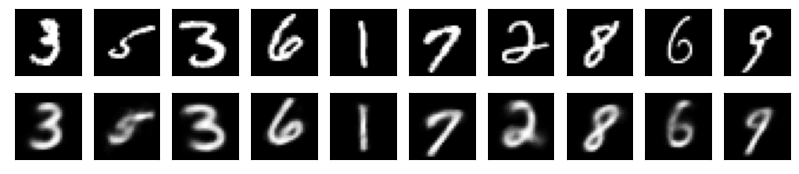

[Epoch 9]


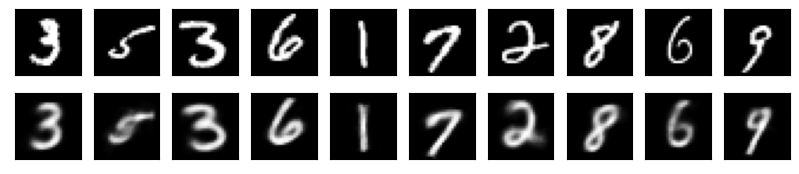

[Epoch 10]


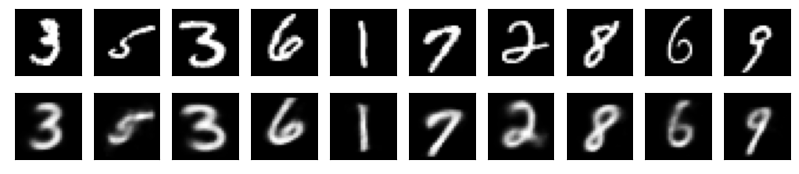

[Epoch 11]


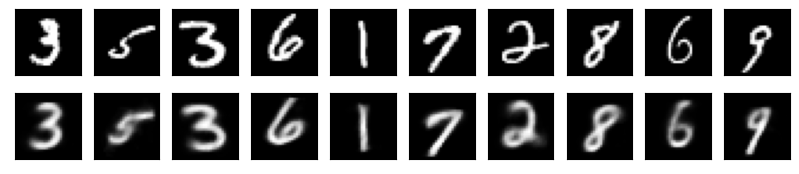

[Epoch 12]


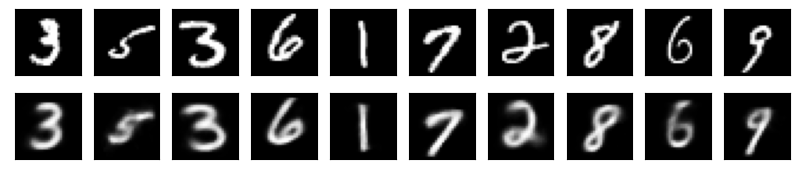

[Epoch 13]


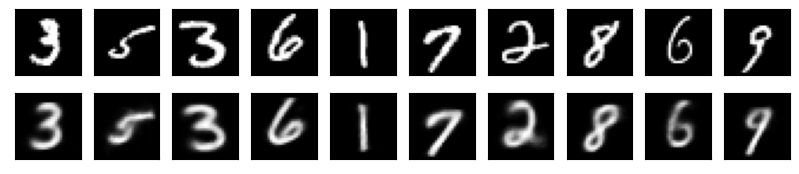

[Epoch 14]


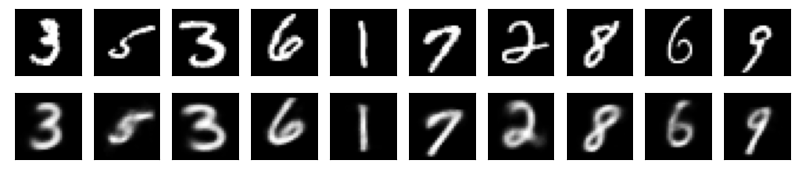

[Epoch 15]


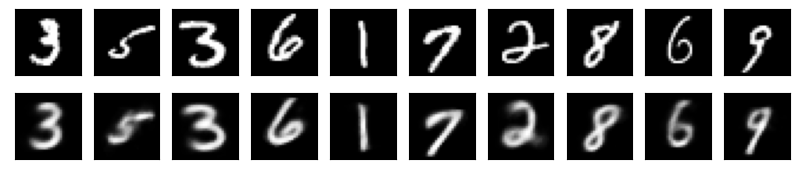

[Epoch 16]


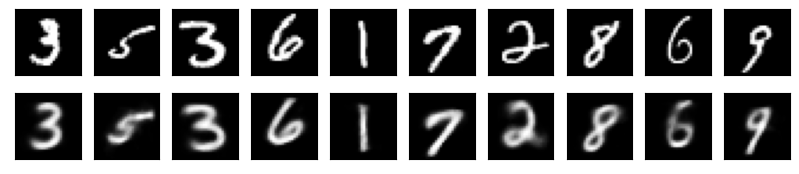

[Epoch 17]


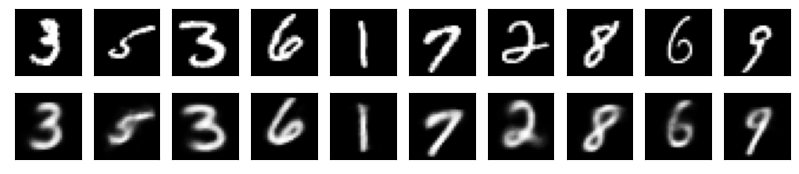

[Epoch 18]


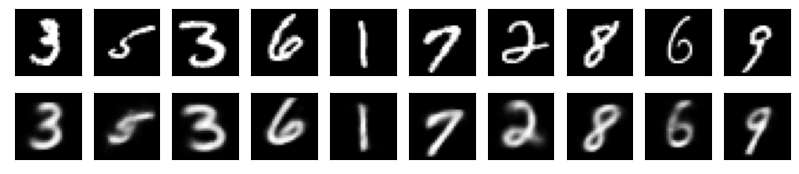

[Epoch 19]


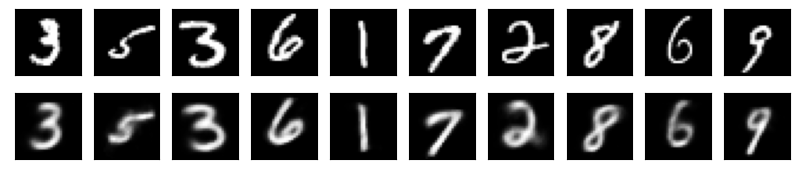

[Epoch 20]


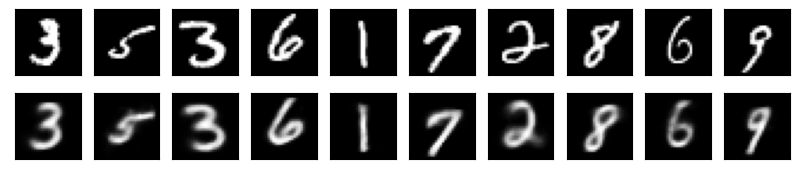

In [11]:
for epoch in range(1, EPOCH+1):
    train(autoencoder, train_loader)
    
    test_x = view_data.to(DEVICE)
    _, decoded_data = autoencoder(test_x)
    
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    print("[Epoch {}]".format(epoch))
    for i in range(10):
        img = np.reshape(view_data.data.numpy()[i],(28,28))
        a[0][i].imshow(img, cmap='gray')
        a[0][i].set_xticks(()); a[0][i].set_yticks(())
        
    for i in range(10):
        img = np.reshape(decoded_data.to("cpu").data.numpy()[i], (28, 28))
        a[1][i].imshow(img, cmap='gray')
        a[1][i].set_xticks(()); a[1][i].set_yticks(())
    plt.show()

[tensor(0.2309), tensor(0.0483), tensor(0.0391), tensor(0.0330), tensor(0.0345), tensor(0.0338), tensor(0.0337), tensor(0.0276), tensor(0.0316), tensor(0.0274), tensor(0.0321), tensor(0.0364), tensor(0.0313), tensor(0.0292), tensor(0.0293), tensor(0.0275), tensor(0.0307), tensor(0.0317), tensor(0.0284), tensor(0.0288)]


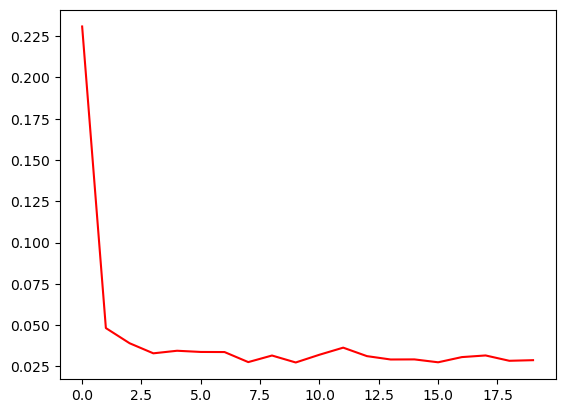

In [10]:
for i in range(len(loss_history)):
    loss_history[i] = loss_history[i].to('cpu')
    
print(loss_history)
    
x_loss = np.reshape([i for i in range(len(loss_history))], newshape=[len(loss_history), 1])
train_loss_data = np.reshape(loss_history, newshape=[len(loss_history),1])

flg = plt.figure()
plt.plot(x_loss, train_loss_data, 'r')
plt.show()